In [1]:
#pip install yfinance

In [2]:
import yfinance as yf

In [2]:
from datetime import datetime

In [8]:
tend = datetime.now()

end = datetime(tend.year + 10 , tend.month , tend.day)
print(end)
start = datetime(tend.year - 10 , tend.month , tend.day)
print(start)

2034-05-12 00:00:00
2014-05-12 00:00:00


In [5]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-12,26.103832,26.436916,25.879448,26.423454,26.423454,38250730
2014-05-13,26.471823,26.730112,26.403011,26.581520,26.581520,33068541
2014-05-14,26.577032,26.577032,26.192589,26.260403,26.260403,23835261
2014-05-15,26.213032,26.221510,25.800165,25.927814,25.927814,34087331
2014-05-16,25.998121,26.018566,25.701437,25.960226,25.960226,29705333


In [10]:
#

In [8]:
google_data.shape

(2518, 6)

In [9]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,73.357067,74.142569,72.633748,73.408455,73.408455,3.183867e+07
std,39.378478,39.846525,38.967612,39.412653,39.412653,1.534534e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.936000e+06
25%,39.072749,39.309774,38.802500,39.129375,39.129375,2.226852e+07
50%,58.969000,59.497250,58.371300,58.986752,58.986752,2.808700e+07
75%,106.150003,107.706003,105.139126,106.248751,106.248751,3.649850e+07
max,175.990005,176.419998,171.399994,173.690002,173.690002,2.232980e+08


In [11]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-05-12 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [14]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of google data')

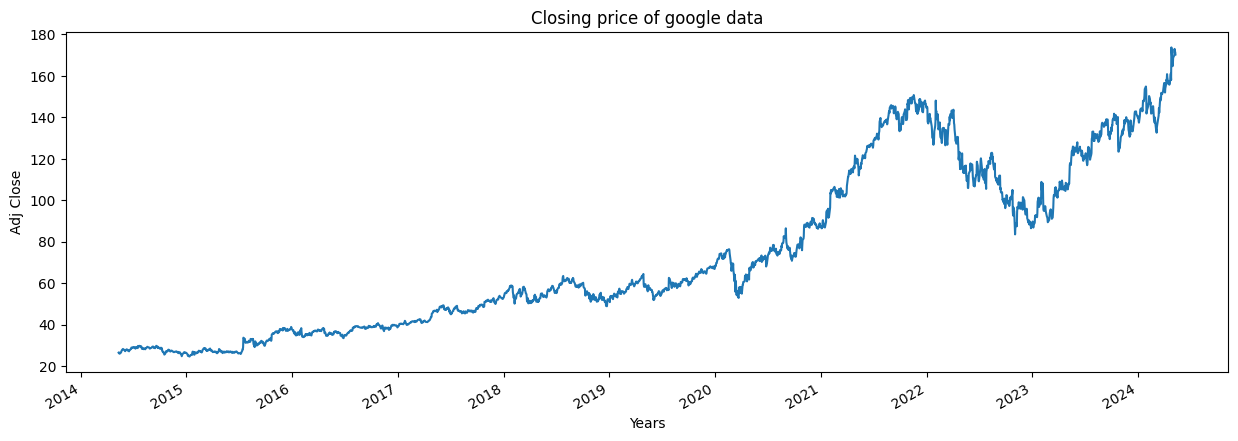

In [16]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of google data")

In [17]:
def plot_graph(figsize , values, column_name):
    plt.figure(figsize = figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

In [18]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

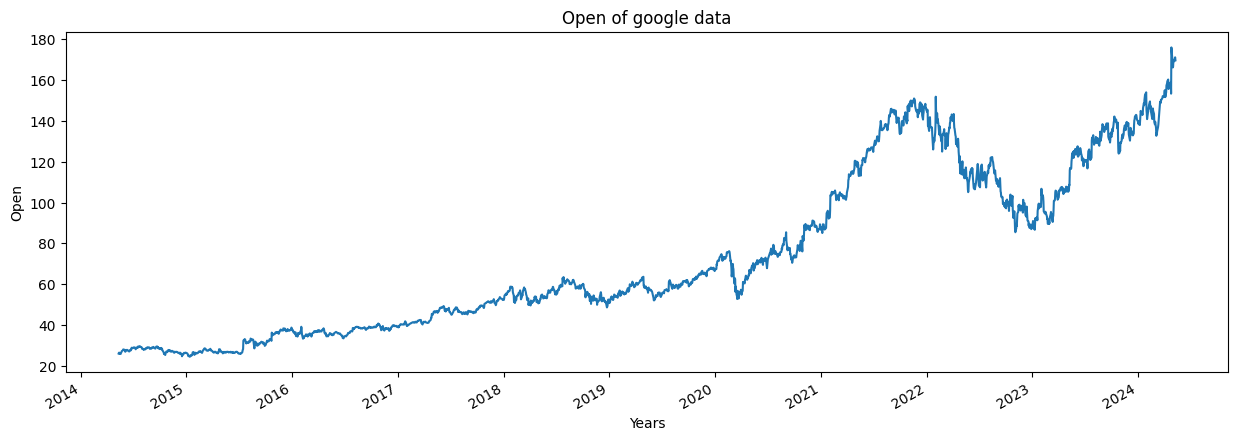

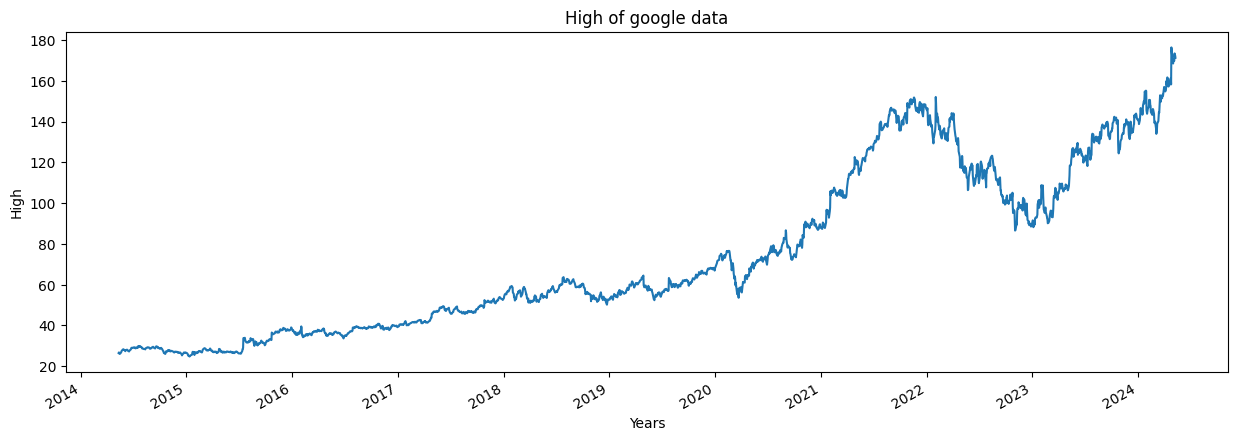

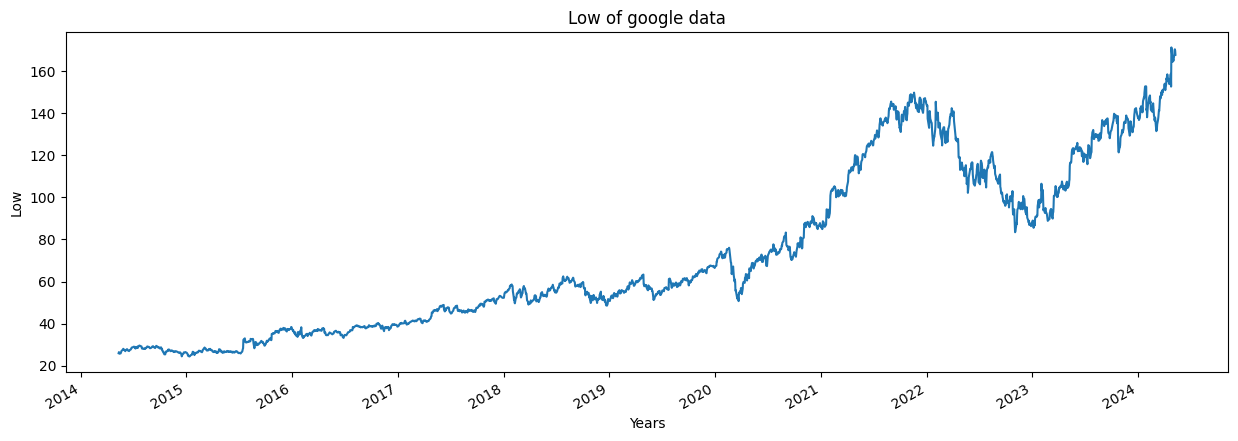

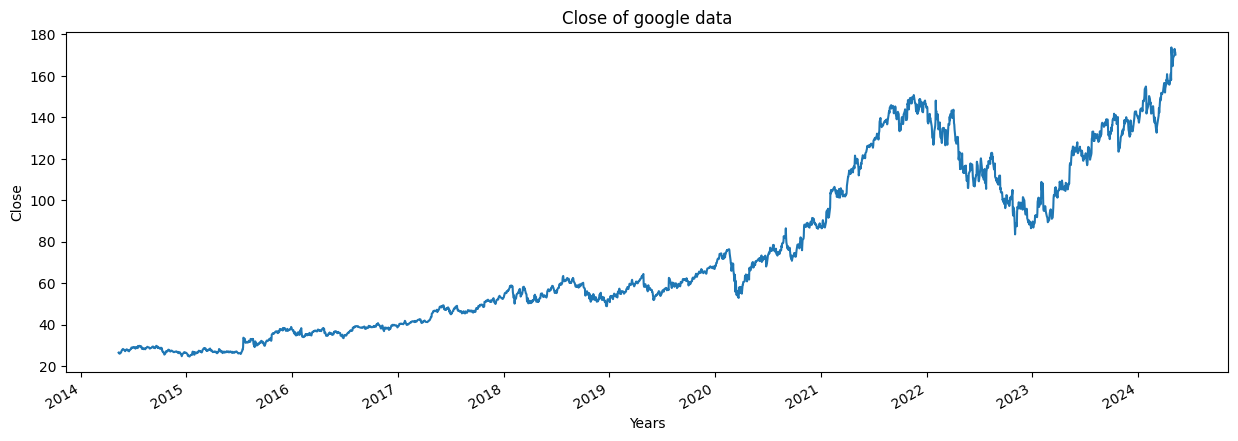

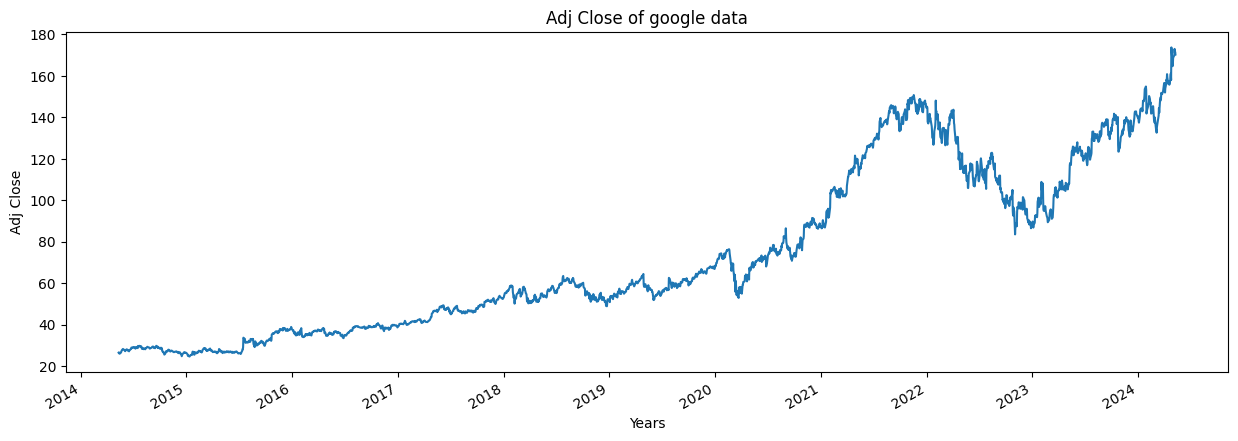

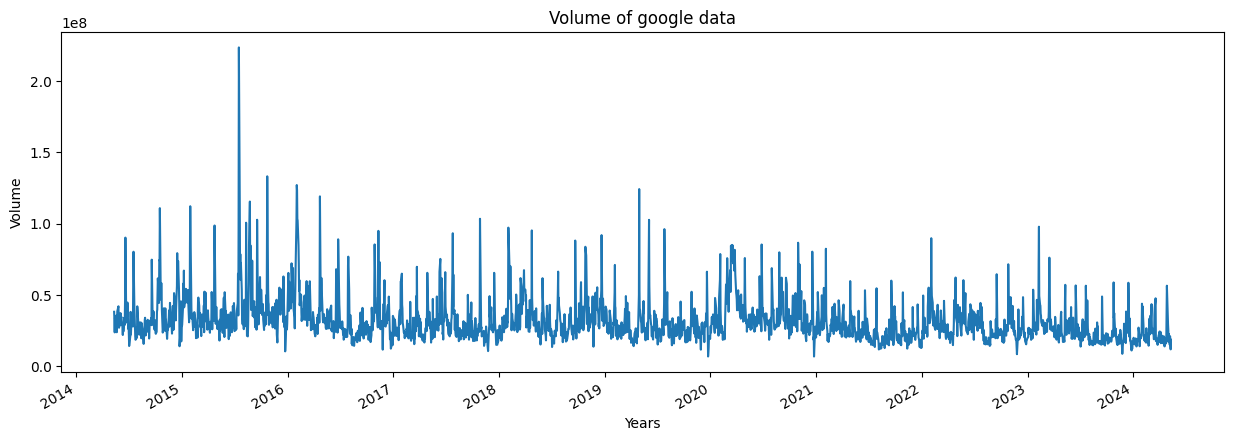

In [19]:
for column in google_data.columns:
    plot_graph((15,5) ,google_data[column] , column)

In [20]:
for i in  range(2014, 2025):
    print(i , list(google_data.index.year).count(i))

2014 163
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 91


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [23]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-05-01          NaN
2015-05-04          NaN
2015-05-05          NaN
2015-05-06          NaN
2015-05-07    27.457835
Name: MA_for_250_days, dtype: float64

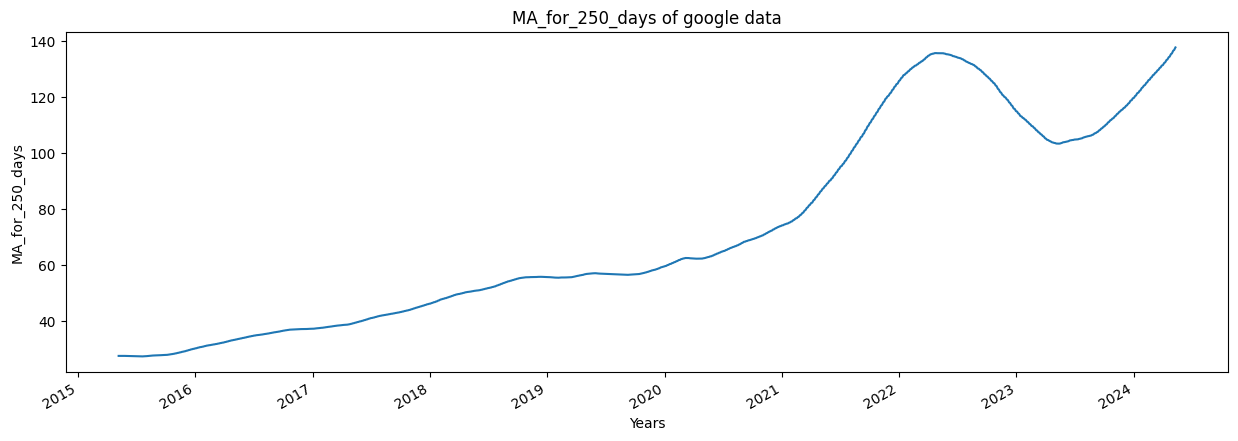

In [28]:
plot_graph((15,5) , google_data['MA_for_250_days'] , 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

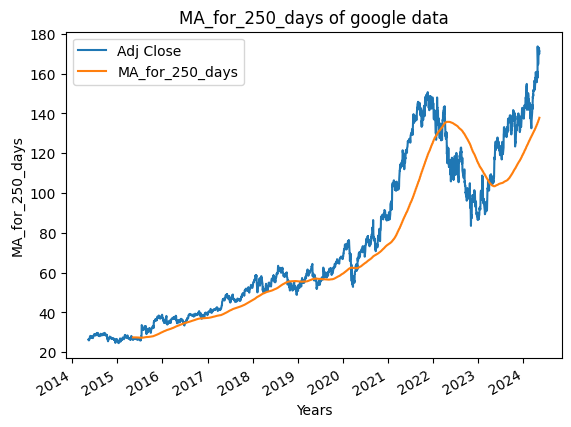

In [29]:
plot_graph((15,5) , google_data[['Adj Close','MA_for_250_days']] , 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

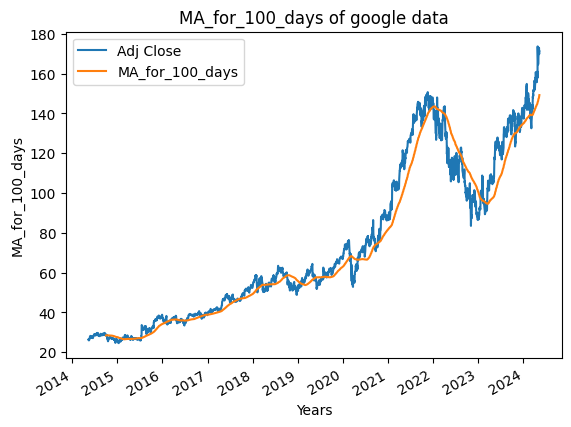

In [30]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5) ,google_data[['Adj Close','MA_for_100_days']] , 'MA_for_100_days' )

<Figure size 1500x500 with 0 Axes>

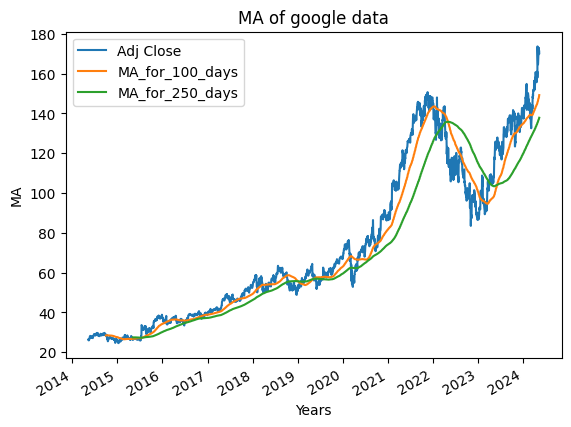

In [31]:
plot_graph((15,5) , google_data[['Adj Close','MA_for_100_days','MA_for_250_days']] , 'MA')

In [32]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()

In [35]:
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-05-12,26.423454,NaN
2014-05-13,26.581520,0.005982
2014-05-14,26.260403,-0.012080
2014-05-15,25.927814,-0.012665
2014-05-16,25.960226,0.001250


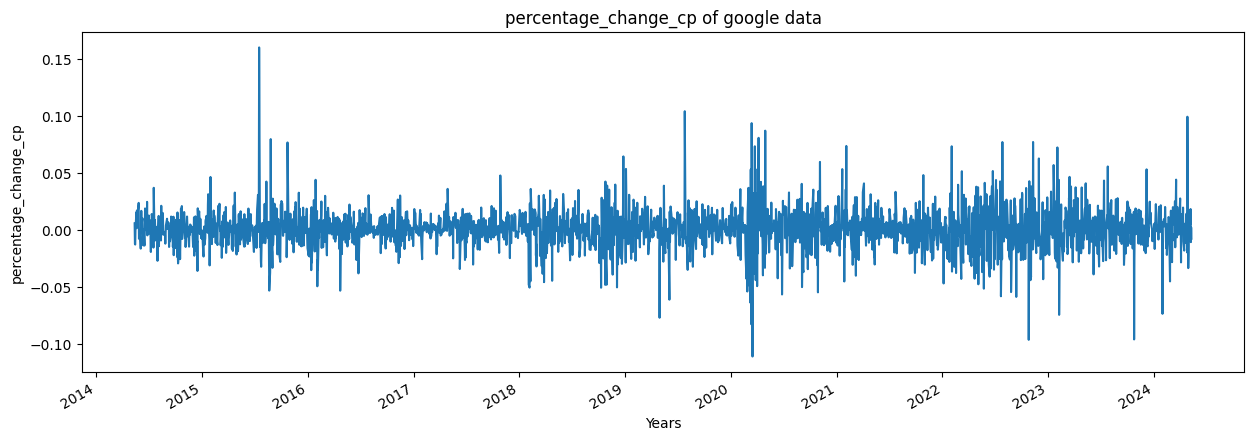

In [36]:
plot_graph((15,5), google_data['percentage_change_cp'] , 'percentage_change_cp')

In [39]:
Adj_close_price = google_data[['Adj Close']]
Adj_close_price.shape

(2518, 1)

In [40]:
max(Adj_close_price.values) , min(Adj_close_price.values)

(array([173.69000244]), array([24.56007004]))

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01249504],
       [0.01355496],
       [0.01140169],
       ...,
       [0.98303494],
       [0.98585126],
       [0.97720103]])

In [42]:
len(scaled_data)

2518

In [43]:
x_data = []
y_data = []

for i in range(100 , len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data) , np.array(y_data)

In [48]:
x_data[0] , y_data[0]

(array([[0.01249504],
        [0.01355496],
        [0.01140169],
        [0.0091715 ],
        [0.00938883],
        [0.01214062],
        [0.01244489],
        [0.01551097],
        [0.01755726],
        [0.02011176],
        [0.02454204],
        [0.02311432],
        [0.02257934],
        [0.02251582],
        [0.02052302],
        [0.01751712],
        [0.01742352],
        [0.02051299],
        [0.02132549],
        [0.02326143],
        [0.02273649],
        [0.02216474],
        [0.01966038],
        [0.01979746],
        [0.01729645],
        [0.01687181],
        [0.02033579],
        [0.02084736],
        [0.02133552],
        [0.02420767],
        [0.02409733],
        [0.0287884 ],
        [0.02790235],
        [0.02831696],
        [0.02766162],
        [0.03013254],
        [0.03002053],
        [0.03082131],
        [0.0299921 ],
        [0.02626065],
        [0.02792911],
        [0.02626398],
        [0.02896562],
        [0.03086812],
        [0.03083803],
        [0

In [49]:
splitting_len = int(len(scaled_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1762, 100, 1)
(1762, 1)
(656, 100, 1)
(656, 1)


In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [58]:
model = Sequential()
model.add(LSTM(128 , return_sequences = True , input_shape = (x_train.shape[1],1)))
model.add(LSTM(64 , return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer= 'adam' , loss = 'mean_squared_error')

In [59]:
model.compile(optimizer= 'adam' , loss = 'mean_squared_error')

In [60]:
model.fit(x_train , y_train , batch_size = 1 , epochs = 2)

Epoch 1/2
1762/1762 [==============================] - 41s 22ms/step - loss: 7.9168e-04
Epoch 2/2
1762/1762 [==============================] - 38s 22ms/step - loss: 3.6903e-04


In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
predictions = model.predict(x_test)
predictions

21/21 [==============================] - 1s 22ms/step


array([[0.7666827 ],
       [0.7643324 ],
       [0.76026976],
       [0.7624092 ],
       [0.7680083 ],
       [0.7766532 ],
       [0.7851084 ],
       [0.7881211 ],
       [0.7840114 ],
       [0.78152466],
       [0.7874234 ],
       [0.7942392 ],
       [0.8019545 ],
       [0.80921066],
       [0.8109882 ],
       [0.81142294],
       [0.80248505],
       [0.79422927],
       [0.7906114 ],
       [0.8037797 ],
       [0.81680024],
       [0.8304448 ],
       [0.8302819 ],
       [0.83078945],
       [0.832884  ],
       [0.83868855],
       [0.8448223 ],
       [0.84938616],
       [0.85186064],
       [0.8474402 ],
       [0.8428911 ],
       [0.84582573],
       [0.84935117],
       [0.8514895 ],
       [0.85261947],
       [0.8565935 ],
       [0.858424  ],
       [0.8531095 ],
       [0.84693843],
       [0.8423551 ],
       [0.83151245],
       [0.8296286 ],
       [0.8230167 ],
       [0.81582016],
       [0.8153173 ],
       [0.8141542 ],
       [0.8160253 ],
       [0.826

In [64]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[138.8954  ],
       [138.5449  ],
       [137.93904 ],
       [138.2581  ],
       [139.0931  ],
       [140.38231 ],
       [141.64323 ],
       [142.09251 ],
       [141.47964 ],
       [141.1088  ],
       [141.98846 ],
       [143.00491 ],
       [144.15549 ],
       [145.2376  ],
       [145.50269 ],
       [145.56752 ],
       [144.2346  ],
       [143.00343 ],
       [142.4639  ],
       [144.42769 ],
       [146.36943 ],
       [148.40425 ],
       [148.37996 ],
       [148.45564 ],
       [148.768   ],
       [149.63365 ],
       [150.54836 ],
       [151.22897 ],
       [151.59799 ],
       [150.93878 ],
       [150.26036 ],
       [150.69801 ],
       [151.22375 ],
       [151.54265 ],
       [151.71117 ],
       [152.3038  ],
       [152.5768  ],
       [151.78423 ],
       [150.86395 ],
       [150.18044 ],
       [148.56346 ],
       [148.28252 ],
       [147.2965  ],
       [146.22327 ],
       [146.14828 ],
       [145.97484 ],
       [146.25388 ],
       [147.8

In [65]:
y_test

array([[0.75036864],
       [0.73228042],
       [0.74845425],
       [0.75634671],
       [0.76862793],
       [0.77446511],
       [0.76636147],
       [0.7520484 ],
       [0.76000788],
       [0.78355787],
       [0.78532144],
       [0.79394138],
       [0.7997183 ],
       [0.79028349],
       [0.79273443],
       [0.76486945],
       [0.76586184],
       [0.77189016],
       [0.81718964],
       [0.81518798],
       [0.8295479 ],
       [0.79939641],
       [0.81340436],
       [0.81962032],
       [0.83231399],
       [0.83605568],
       [0.83679667],
       [0.83610602],
       [0.8185207 ],
       [0.81933874],
       [0.83876805],
       [0.83704142],
       [0.83494931],
       [0.83485538],
       [0.84589946],
       [0.8408267 ],
       [0.82155497],
       [0.81939911],
       [0.81913421],
       [0.79290541],
       [0.8150874 ],
       [0.79053161],
       [0.78493918],
       [0.79941319],
       [0.79099092],
       [0.79954722],
       [0.82797884],
       [0.832

In [66]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[136.4624939 ],
       [133.76499939],
       [136.17700195],
       [137.35400391],
       [139.1855011 ],
       [140.05599976],
       [138.84750366],
       [136.71299744],
       [137.8999939 ],
       [141.41200256],
       [141.67500305],
       [142.960495  ],
       [143.82200623],
       [142.41499329],
       [142.78050232],
       [138.625     ],
       [138.772995  ],
       [139.67199707],
       [146.42750549],
       [146.1289978 ],
       [148.27049255],
       [143.77400208],
       [145.86300659],
       [146.78999329],
       [148.68299866],
       [149.24099731],
       [149.35150146],
       [149.24850464],
       [146.62600708],
       [146.7480011 ],
       [149.64549255],
       [149.38800049],
       [149.07600403],
       [149.06199646],
       [150.70899963],
       [149.95249939],
       [147.07850647],
       [146.75700378],
       [146.71749878],
       [142.80599976],
       [146.11399841],
       [142.45199585],
       [141.61799622],
       [143

In [67]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2 ))
rmse

4.114114710995121

In [72]:
import pandas as pd

plotting_data = pd.DataFrame(
    {
        'original_data': inv_y_test.reshape(-1),
        'predicted ': inv_predictions.reshape(-1)
    }
    , index = google_data.index[splitting_len+100:]
    
)
plotting_data.head()

,original_data,predicted
Date,,
2021-10-01,136.462494,138.895401
2021-10-04,133.764999,138.544907
2021-10-05,136.177002,137.939041
2021-10-06,137.354004,138.258102
2021-10-07,139.185501,139.093094


<Figure size 1500x600 with 0 Axes>

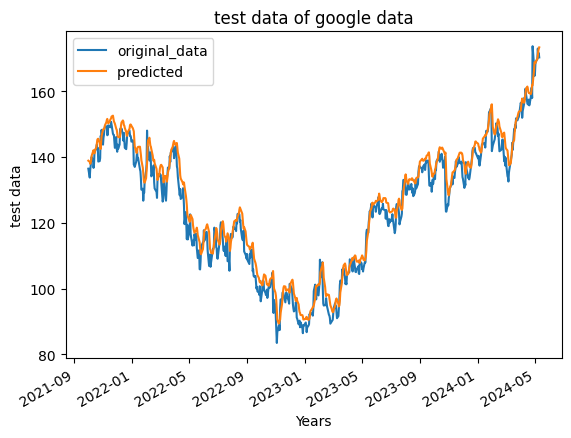

In [73]:
plot_graph((15,6) , plotting_data , 'test data')

<Figure size 1500x500 with 0 Axes>

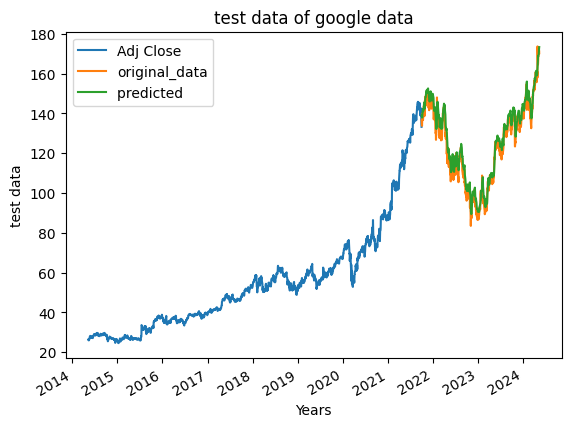

In [75]:
plot_graph((15,5) , pd.concat([Adj_close_price[:splitting_len + 100] , plotting_data]) , 'test data')

In [76]:
model.save("Latest_stock_price_model.keras")